## 1.0 Business Understanding


#### 1.1 Business Overview  
Customer churn, where subscribers discontinue services or switch to competitors, is a major challenge in the telecom industry. A [2024 study by Alisha Sikri and colleagues](https://www.nature.com/articles/s41598-024-63750-0), published in Scientific Reports emphasizes that retaining existing customers is more cost-effective than acquiring new ones, making churn prediction a strategic priority.  

Syriatel, one of Syria’s largest telecom providers with over 6 million active customers and a 55% market share, faces rising churn despite strong coverage and service reliability. This project leverages machine learning to predict at-risk customers, enabling proactive retention strategies that improve loyalty, optimize resources, and sustain profitability.  


#### 1.2 Business Problem

Syriatel is struggling with rising customer churn, which threatens its revenue and market position. The company lacks a clear way to know customers that are likely to leave. Without timely insights, Syriatel risks losing more customers to competitors and incurring higher costs to replace them. Developing a predictive solution is critical to identify at-risk customers early and take proactive steps to retain them.  


#### 1.3 Business Objectives

Main Objective

To build a machine learning model that accurately predicts whether a customer is likely to churn.

Specific Objectives

1. To determine how customer demographics influence churn.  
2. To examine the effect of service usage on churn.  
3. To analyze the impact of financial factors on churn.  
4. To identify behavioral indicators that signal potential churn.  
5. To segment customers and assess which groups are most at risk of churning.  

Research Questions  
1. How do customer demographics influence churn?  
2. Does service usage affect the likelihood of churn?  
3. How do financial factors such as billing and payment methods relate to churn?  
4. What behavioral indicators can signal potential churn?  
5. Which customer segments are most at risk of churning?  



#### 1.4 Success criteria:
 - A reliable classification model that can correctly predict customer churn and provide actionable insights for SyriaTel
 - The model identifies the most important features that explain why customers churn
 - The findings can be translated into clear, practical recommendations that SyriaTel can act on to reduce churn

## 2.0 Data Understanding

The dataset is obtained from Kaggle, specifically from the dataset [Churn in Telecom's dataset](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset).

The dataset has 3333 records and 21 columns including numeric, categorical, and boolean variables.The target variable `churn`  indicates whether a customer has left the service (Yes) or remained (No).


#### 2.1 Load Dataset
1. Import libraries (pandas, numpy, matplotlib, seaborn).
2. Load dataset.

In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')



In [2]:
# Load dataset 
data = pd.read_csv(r"C:/Users/user/Downloads/bigml_59c28831336c6604c800002a.csv")
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


#### 2.2 Dataset Overview

In [3]:
# Summaryinformation about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

The dataset contains 3,333 rows which represent the customers. The data set has 21 columns which are both numeric(total minutes, charges, account length) and categorical(international plan, voicemail plan) Our Target variable is `Churn`.

In [4]:
# statistical summary of the dataset
data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [5]:
#checking the columns
data.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [6]:
# Check for duplicate values
data.duplicated().sum()

0

In [7]:
#checking for missing values
data.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

No missing values recorded in the dataset

In [8]:
#Checking the distribution for class imbalance
data['churn'].value_counts()

churn
False    2850
True      483
Name: count, dtype: int64

In [9]:
#checking the % of class imbalance
data['churn'].value_counts(normalize = True) * 100

churn
False    85.508551
True     14.491449
Name: proportion, dtype: float64

In [10]:
data= data.drop(columns=[ 'phone number'])
data.columns

Index(['state', 'account length', 'area code', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn'],
      dtype='object')

## Exploratory Data Analysis

* Univariate Analysis

In [11]:
# Distribution of categorical features
categorical_features = data.select_dtypes(include = ["category", "object"]).columns
categorical_features

Index(['state', 'international plan', 'voice mail plan'], dtype='object')

churn
False    85.508551
True     14.491449
Name: proportion, dtype: float64


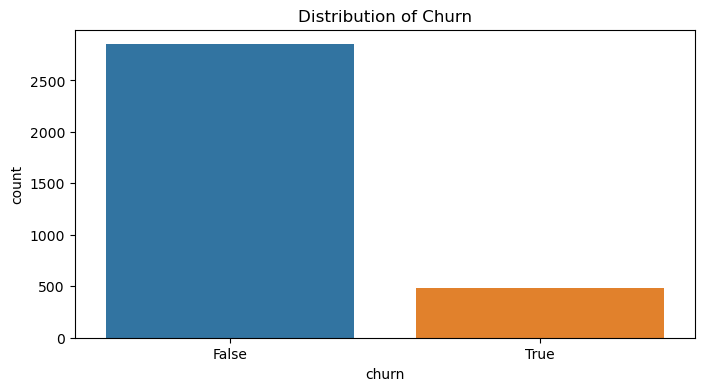

In [12]:
# Distribution of target variable churn

data["churn"].value_counts() # Count of target variable

# Percentage of target variable
churn_percentage = data["churn"].value_counts(normalize = True) * 100
print(churn_percentage)

# Visualize the target variable distribution
plt.figure(figsize = (8, 4))
sns.countplot(x = "churn", data = data)
plt.title("Distribution of Churn")
plt.show()

In [13]:
#check for unique values in the columns
data.nunique()

state                       51
account length             212
area code                    3
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

* Plot the unique values of the categorical variables, focusing on those with the fewest unique variables

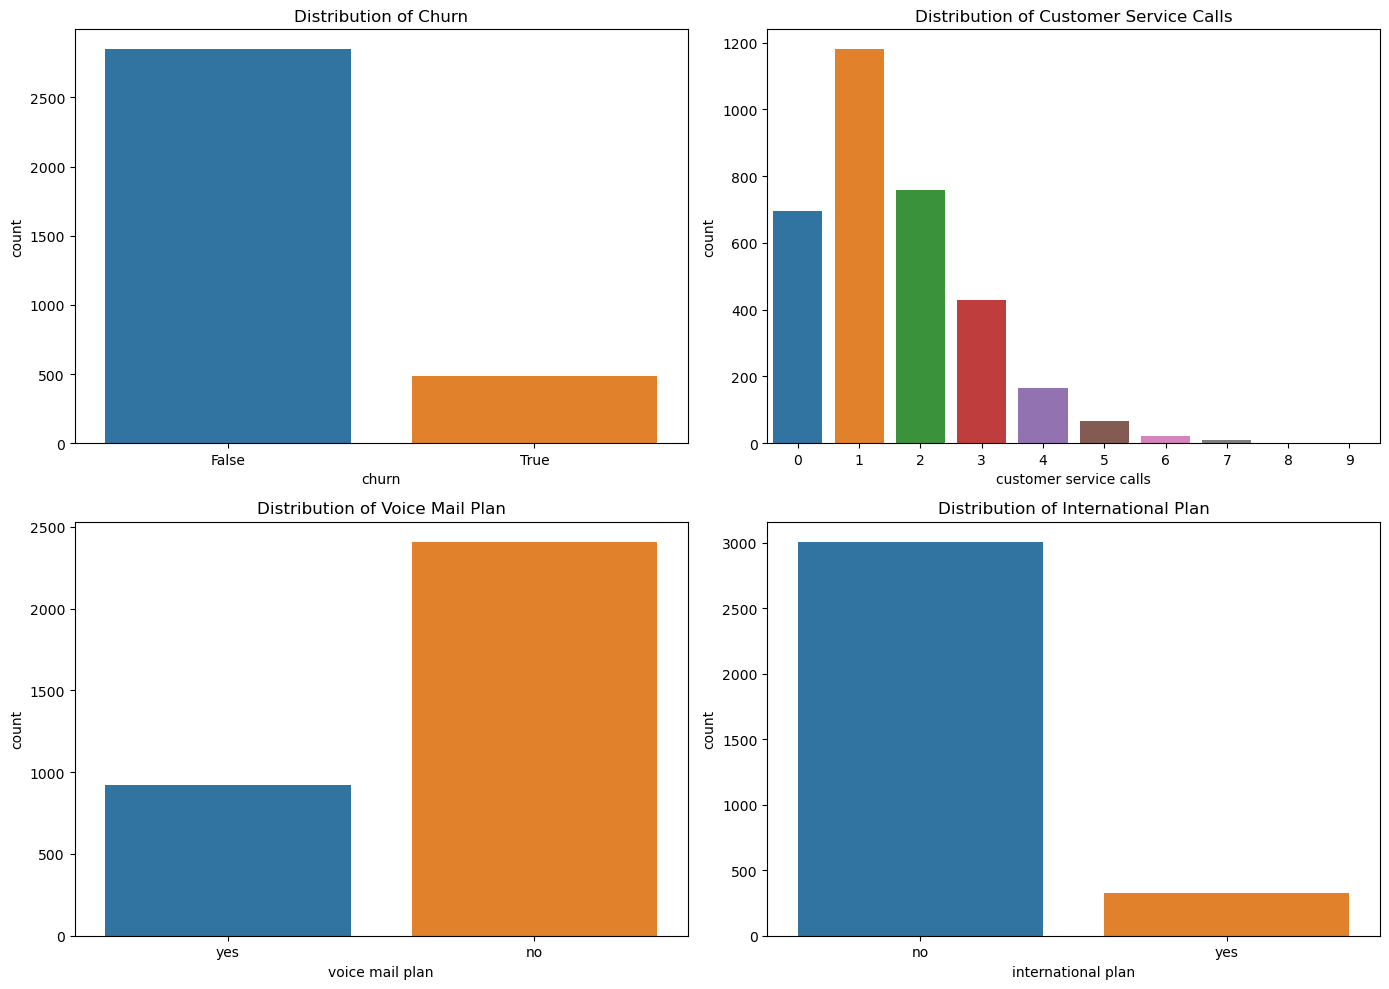

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot for churn
sns.countplot(ax=axes[0, 0], x='churn', data=data)
axes[0, 0].set_title('Distribution of Churn')

# Plot for customer service calls
sns.countplot(ax=axes[0, 1], x='customer service calls', data=data)
axes[0, 1].set_title('Distribution of Customer Service Calls')

# Plot for voice mail plan
sns.countplot(ax=axes[1, 0], x='voice mail plan', data=data)
axes[1, 0].set_title('Distribution of Voice Mail Plan')

# Plot for international plan
sns.countplot(ax=axes[1, 1], x='international plan', data=data)
axes[1, 1].set_title('Distribution of International Plan')

plt.tight_layout()
plt.show()

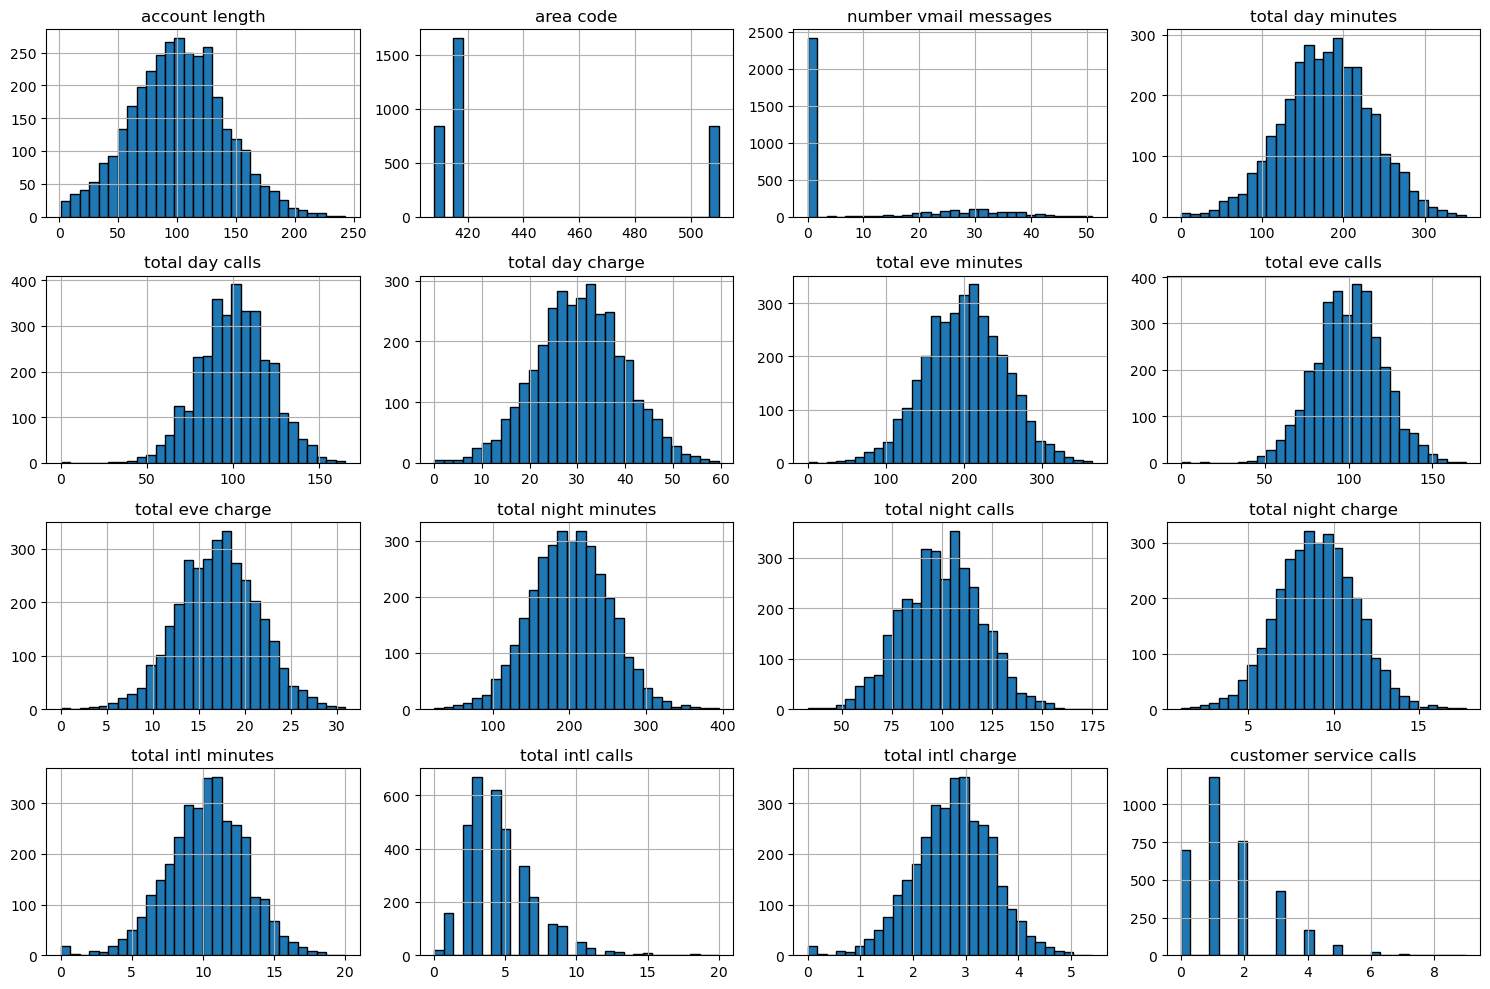

In [15]:
# Plot histograms only for numeric columns
data.select_dtypes(include='number').hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.tight_layout()
plt.show()

Most features, including account length, total calls,total minutes, and total charges, show a normal distribution

**Bivariate Analysis**

Bivariate analysis examines the relationship between two variables to see how one may affect or relate to the other

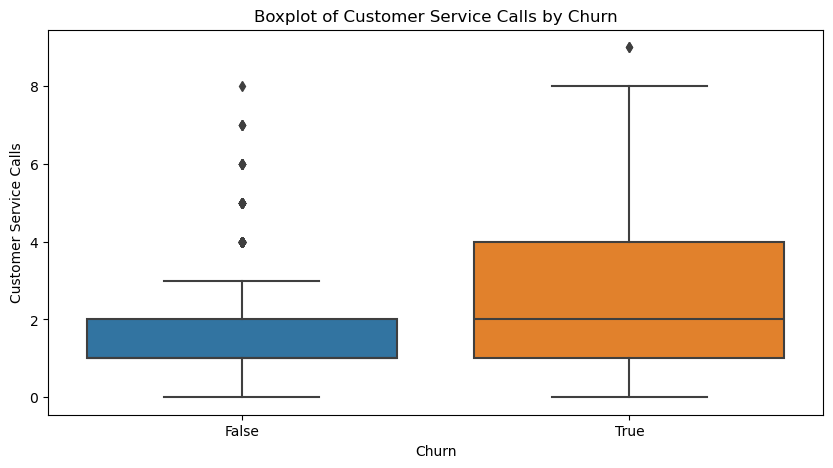

In [16]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x='churn', y='customer service calls')
plt.title('Boxplot of Customer Service Calls by Churn')
plt.xlabel('Churn')
plt.ylabel('Customer Service Calls')
plt.show()

Customers who churn tend to have made more customer service calls compared to those who stay.ls

Effects on international or voicemail plan to churn

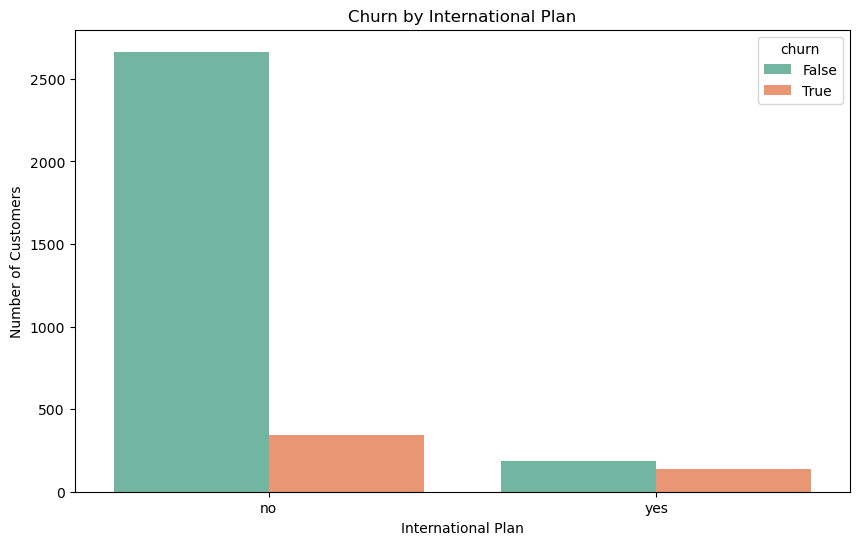

In [17]:
# Plot to show relationship between international plan and churn
plt.figure(figsize = (10,6))
sns.countplot(x = 'international plan', hue = data['churn'].astype(str), data = data, palette = 'Set2')
plt.title("Churn by International Plan")
plt.xlabel("International Plan")
plt.ylabel("Number of Customers")
plt.show()

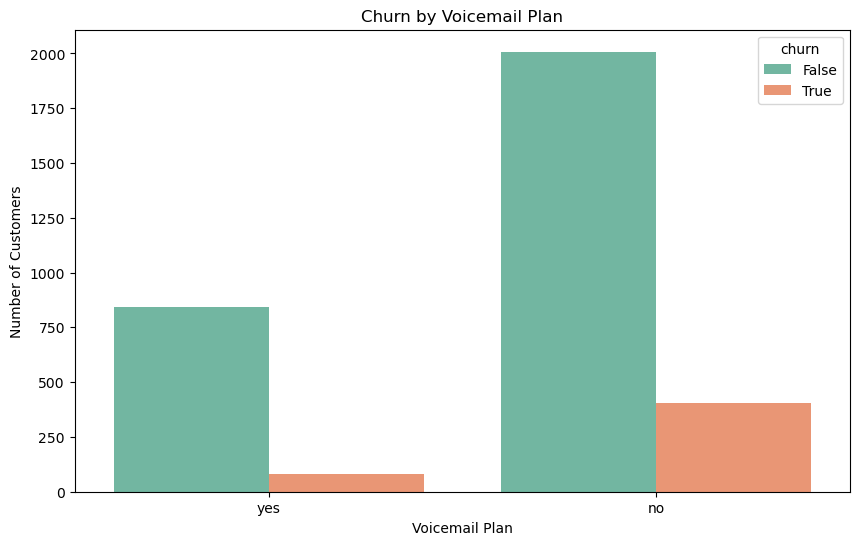

In [18]:
# Bar plot to show the relationship between voicemail plan and churn
plt.figure(figsize = (10, 6))
sns.countplot(x = 'voice mail plan', hue = data['churn'].astype(str), data = data, palette = 'Set2')
plt.title("Churn by Voicemail Plan")
plt.xlabel("Voicemail Plan")
plt.ylabel("Number of Customers")
plt.show();

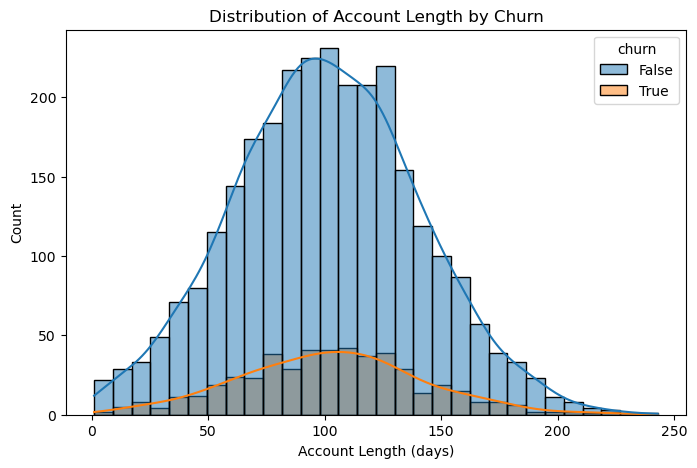

In [19]:
#histogram to show the distribution of account length by churn
plt.figure(figsize = (8,5))
sns.histplot(data = data, x = 'account length', hue = 'churn', kde = True, bins = 30)
plt.title("Distribution of Account Length by Churn")
plt.xlabel("Account Length (days)")
plt.ylabel("Count")
plt.show()

Both groups look like a bell curve. People who are new to th company leave more often, while those who have stayed longer are less likely to leave

 **Multivariate analysis**

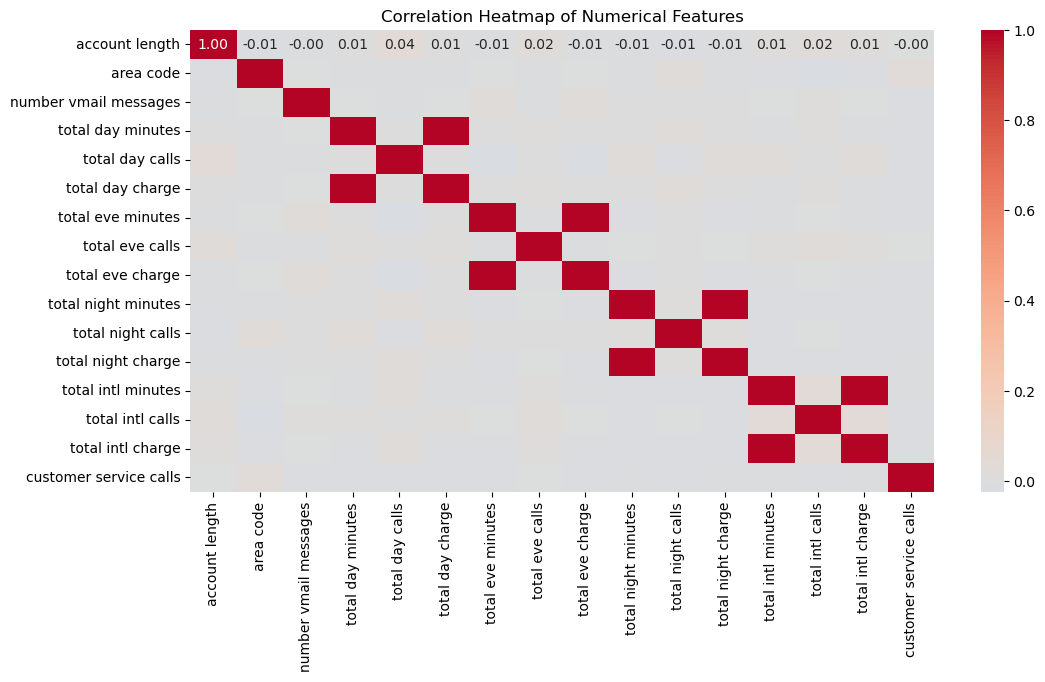

In [20]:
numeric_data = data.select_dtypes(include = ["number"])
plt.figure(figsize = (12, 6))
sns.heatmap(numeric_data.corr(), annot = True, cmap = "coolwarm", center = 0, fmt = ".2f")
#annot is for placing the numbers inside the squares
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [21]:
# checking out for outliers
data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


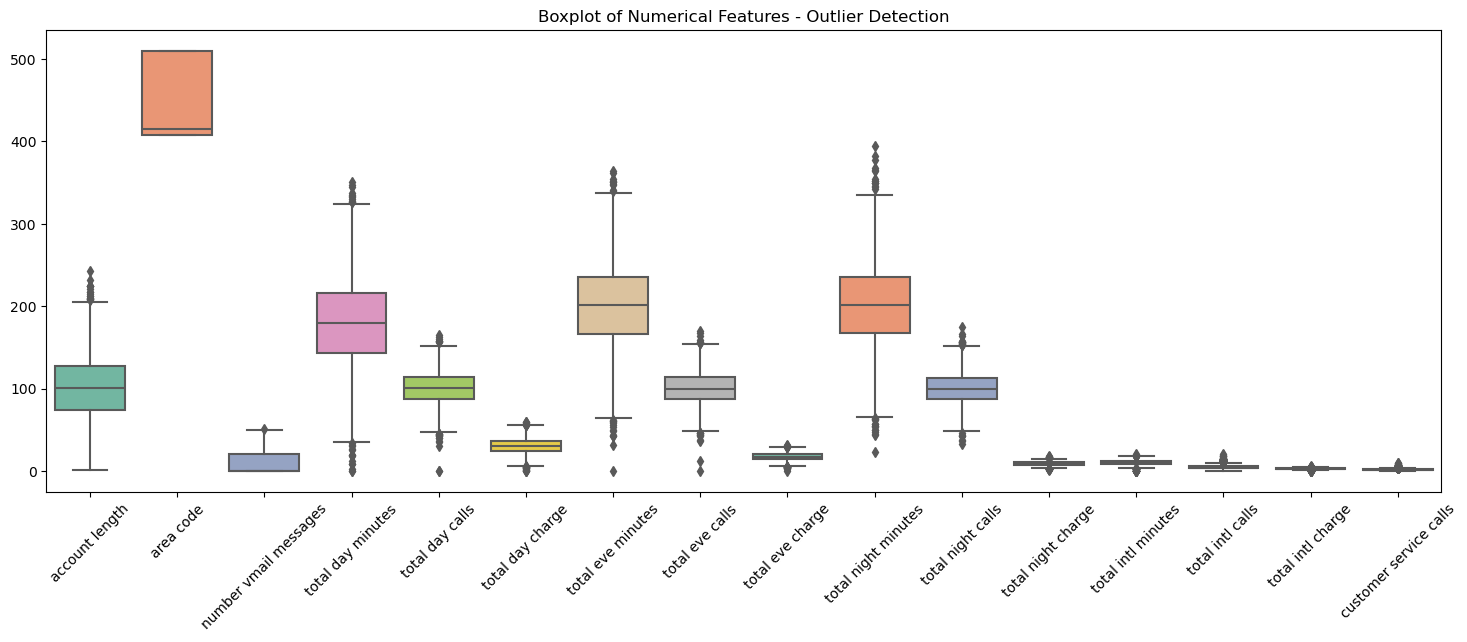

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_features = data.select_dtypes(include=["int64", "float64"]).columns

plt.figure(figsize=(18, 6))
palette = sns.color_palette("Set2", len(numerical_features))  

sns.boxplot(data=data[numerical_features], palette=palette)

plt.title("Boxplot of Numerical Features - Outlier Detection")
plt.xticks(rotation=45)
plt.show()


# Encoding

In [23]:
print("Value counts before encoding:")
print(data['churn'].value_counts())

Value counts before encoding:
churn
False    2850
True      483
Name: count, dtype: int64


In [24]:
# Importing a library
from sklearn.preprocessing import LabelEncoder

In [25]:
label_encoder = LabelEncoder() # create an instance of Label Encoder
data["churn"] = label_encoder.fit_transform(data["churn"]) # Fit and transform the target variable

# Check the counts after encoding
print("Value counts after encoding:")
print(data['churn'].value_counts())

Value counts after encoding:
churn
0    2850
1     483
Name: count, dtype: int64


**one hot encoding**

In [26]:
data = pd.get_dummies(data, columns = ["state", "area code", "international plan", "voice mail plan"], drop_first = True)
data.shape

(3333, 70)